**Machine Learning and Data Science ‐ ENCS5341**

**Raghad Afaghani-1192423**

**Assignment #1**

This assignment looks at a dataset about different cars, focusing on their fuel efficiency and other features. The data includes things like how many miles a car can travel on a gallon of fuel (mpg), the number of cylinders in the engine, engine size (displacement), power (horsepower), car weight, and how quickly the car can speed up (acceleration). It also tells us the year the car model was made and where it comes from. The main goal is to understand how these features affect a car's fuel use and to try to predict fuel efficiency based on them. We'll especially look at cars made in 1970 from the USA to see how these factors come together.



***1- Read the dataset and examine how many features and examples does it have?
(Hint: you can use Pandas to load the dataset into a dataframe)***

In [61]:
#Reading the dataset
import pandas as pd
df = pd.read_csv('/content/cars.csv')
print(df.head())



    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin  
0          70    USA  
1          70    USA  
2          70    USA  
3          70    USA  
4          70    USA  


I use a tool called Pandas to read the dataset from a 'cars.csv' and  show the first five rows of the data. This data includes information about cars like how much fuel they use(mpg),their cylinders size(displacement), power, weight, acceleration and where they're from. The example shows cars made in 1970 from the USA.

***2- Are there features with missing values? How many missing values are there ineach one?
(Hint: you can use isnull() from Pandas)***

In [62]:
# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values)


Missing Values:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          2
dtype: int64


In this code, I used Pandas to look for missing data(nulls attributes) in the car dataset. It tells us that there are 6 missing entries in the horsepower column and 2 in the origin column. Other features  have no missing data.

***3- Fill the missing values in each feature using a proper imputation method (for example: fill with mean, median, or mode)***

In [63]:
# Impute 'horsepower' with the median
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

# Impute 'origin' with the mode
df['origin'].fillna(df['origin'].mode()[0], inplace=True)


In this code, I use Imputation to fix missing data in our car dataset. I fill in the 6 missing horsepower spots with the average value(median value). For the 2 missing spots in origin, I use the most common origin value(mean value).
Once the missing information is filled in, a check confirms that all parts of the dataset are now complete for analysis.


In [71]:
# Check if missing values have been handled
missing_values = df.isnull().sum()
print("\nMissing Values after Imputation:")
print(missing_values)



Missing Values after Imputation:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


***4- Which country produces cars with better fuel economy?
(Hint: use box plot that shows the mpg for each country (all countries in one plot))***

A box plot is a simple graph that helps us see how numbers in a group vary. It looks like a box with lines extending from the top and bottom. The box shows the middle range of numbers, and the lines point to the smallest and largest numbers in the group. This graph is useful for comparing different groups, like seeing which group has bigger or more spread out numbers.

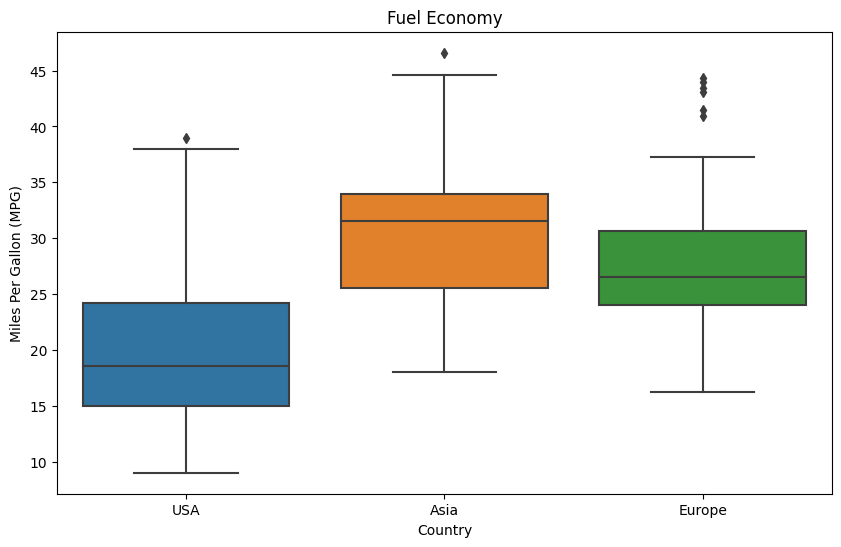

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='origin', y='mpg', data=df)

plt.title('Fuel Economy')
plt.xlabel('Country')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()


This code makes a graph showing how much fuel cars from different countries use. It uses Seaborn and Matplotlib to create a box plot that compares car [miles per gallon] from various countries.

Looking at the chart and the median lines, it appears that Asia has a higher median mpg compared to the USA and Europe, suggesting that, on average, Asian cars have better fuel economy. follow it Europe which also shows a relatively high median value. The USA appears to have the lowest median value of fuel economy among the three.

***5- Which of the following features has a distribution that is most similar to a
Gaussian: ‘acceleration’, ‘horsepower’, or ‘mpg’? Answer this part by showing
the histogram of each feature.***

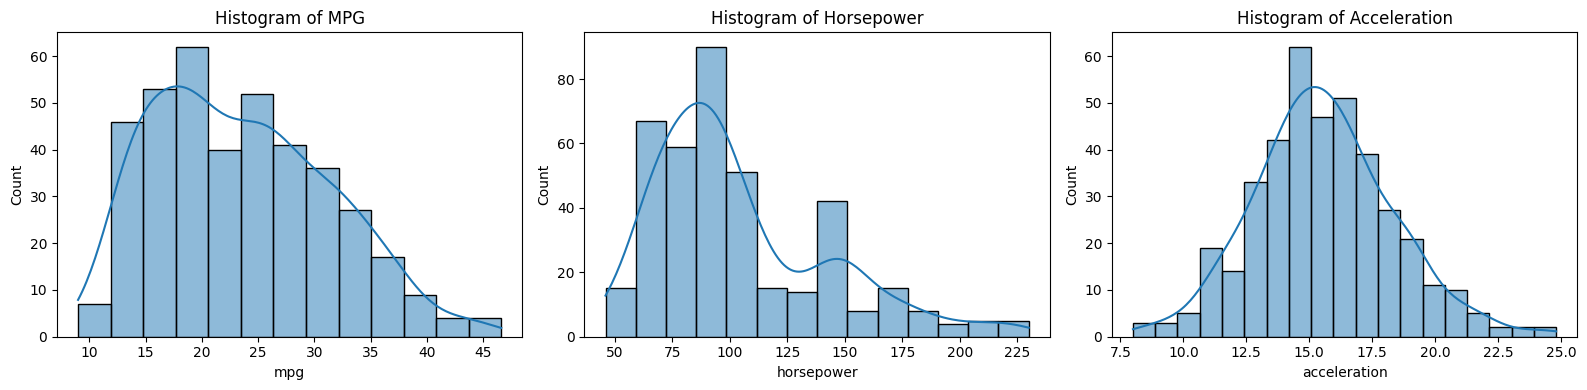

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, axs = plt.subplots(figsize=(16, 4), ncols=3)

# Create a histogram for Mpg
sns.histplot(data=df, x="mpg", ax=axs[0], kde=True)
axs[0].set_title('Histogram of MPG')

# Create a histogram for Horsepower
sns.histplot(data=df, x="horsepower", ax=axs[1], kde=True)
axs[1].set_title('Histogram of Horsepower')

# Create a histogram for Acceleration
sns.histplot(data=df, x="acceleration", ax=axs[2], kde=True)
axs[2].set_title('Histogram of Acceleration')

# Display the figures
plt.tight_layout()
plt.show()


The code employs Matplotlib and Seaborn libraries to plot three histograms that represent mpg, horsepower, and acceleration data. Accompanying each histogram is a smoothed line that reflects the overall trend of the data distribution.

Among acceleration, horsepower, and mpg,The acceleration graph is the one that looks most like a bell curve, making it the closest to a Gaussian distribution. In contrast, both mpg and horsepower display a right-skewed distribution.

***6- Support your answer for part 5 by using a quantitative measure***

-Skewness close to 0: The data distribution is roughly symmetric.

-Negative skewness: The distribution has a longer left tail (left-skewed).

-Positive skewness: The distribution has a longer right tail (right-skewed).

-Kurtosis close to 3: The distribution's tails are similar to a normal distribution.

-Kurtosis less than 3: The distribution has a flatter peak and lighter tails, which means it's less likely to have extreme values or outliers (lighter-tailed distribution).

-Kurtosis greater than 3: The distribution has a sharper peak and heavier tails, indicating a higher likelihood of extreme values (heavy-tailed distribution).






In [67]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for each feauture
mpg_skew = skew(df['mpg'])
mpg_kurt = kurtosis(df['mpg'])

hp_skew = skew(df['horsepower'])
hp_kurt = kurtosis(df['horsepower'])

acc_skew = skew(df['acceleration'])
acc_kurt = kurtosis(df['acceleration'])

print(f"In MPG: The Skewness = {mpg_skew}, Kurtosis = {mpg_kurt}")
print(f"In Horsepower: The Skewness = {hp_skew}, Kurtosis = {hp_kurt}")
print(f"In Acceleration: The Skewness = {acc_skew}, Kurtosis = {acc_kurt}")


In MPG: The Skewness = 0.45534192556309266, Kurtosis = -0.5194245405990441
In Horsepower: The Skewness = 1.1020507336340302, Kurtosis = 0.7389866011161756
In Acceleration: The Skewness = 0.27772507624356363, Kurtosis = 0.3992077323931644


Based on these statistics, acceleration has the skewness and kurtosis values closest to those of a Gaussian distribution. Its skewness is near 0, indicating a nearly symmetrical distribution, and its kurtosis is closer to 3 compared to the other features.


***7- Plot a scatter plot that shows the ‘horsepower’ on the x-axis and ‘mpg’ on the
y-axis. Is there a correlation between them? Positive or negative?***

This code creates a scatterplot showing the relationship between car Horsepower and MPG (Miles Per Gallon), facilitating the observation of any correlation.

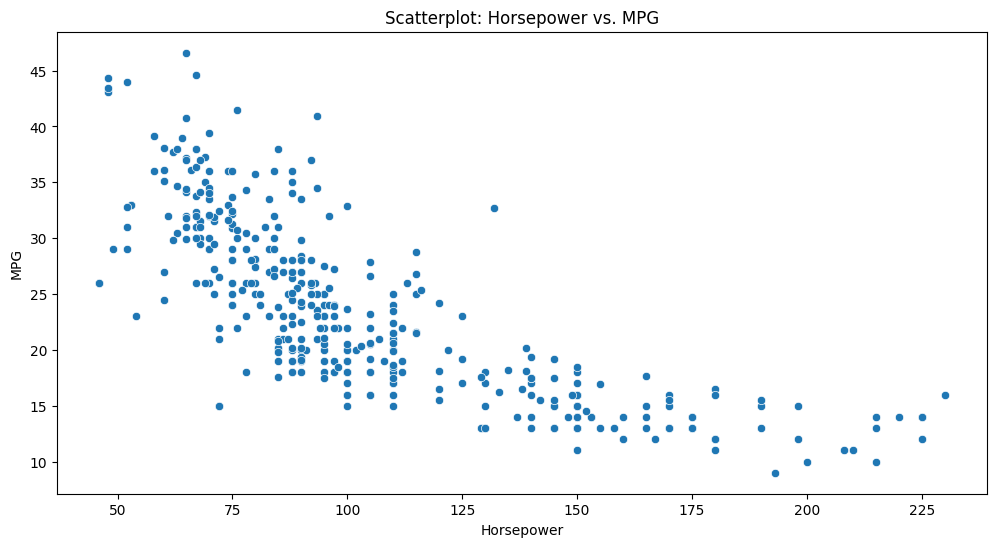

In [68]:
# Create a figure
plt.figure(figsize=(12, 6))

# The Scatterplot
sns.scatterplot(data=df, x="horsepower", y="mpg")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Scatterplot: Horsepower vs. MPG")

# Show the plot
plt.show()


The relationship between [horsepower] and [mpg] exhibits a negative correlation, signifying that when 'horsepower' increases, 'mpg' typically decreases, and conversely. The observed trend in the data suggests that higher horsepower is linked to lower fuel efficiency (mpg), aligning with the conventional understanding that more potent engines often consume greater amounts of fuel.

***8- Implement the closed form solution of linear regression and use it to learn a
linear model to predict the ‘mpg’ from the ‘horsepower’. Plot the learned line
on the same scatter plot you got in part 7.
(Hint: This is a simple linear regression problem (one feature). Do not forget to add
x0=1 for the intercept. For inverting a matrix use np.linalg.inv from NumPy)***

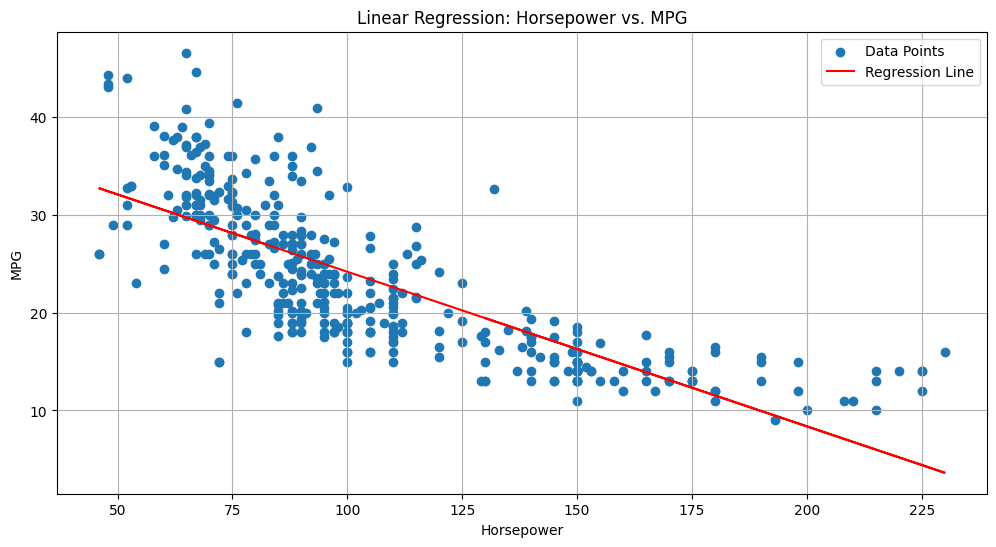

Intercept (theta0) = 40.01131787111278, Slope (theta1) = -0.15816020313402746


In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Convert to numpy array
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values

# Add a column for the intercept
X = np.hstack((np.ones(X.shape), X))

# Closed form solution is (X^T * X)^-1 * X^T * y
X_transpose = X.T
beta_hat = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

# Target Value
y_pred = X.dot(beta_hat)


plt.figure(figsize=(12, 6))
plt.scatter(df['horsepower'], df['mpg'], label='Data Points')
plt.plot(df['horsepower'], y_pred, color='red', label='Regression Line')

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Linear Regression: Horsepower vs. MPG')
plt.legend()
plt.grid(True)

plt.show()

# Display coefficients, intercept
intercept, slope = beta_hat[0], beta_hat[1]
print(f'Intercept (theta0) = {intercept}, Slope (theta1) = {slope}')


The regression line, depicted in red, is derived from applying linear regression to forecast mpg based on horsepower.The line trends downward, indicating that cars with more horsepower tend to have lower mpg.

***9- Repeat part 8 but now learn a quadratic function of the form
f = w0 + w1x + w2xpow2***
.

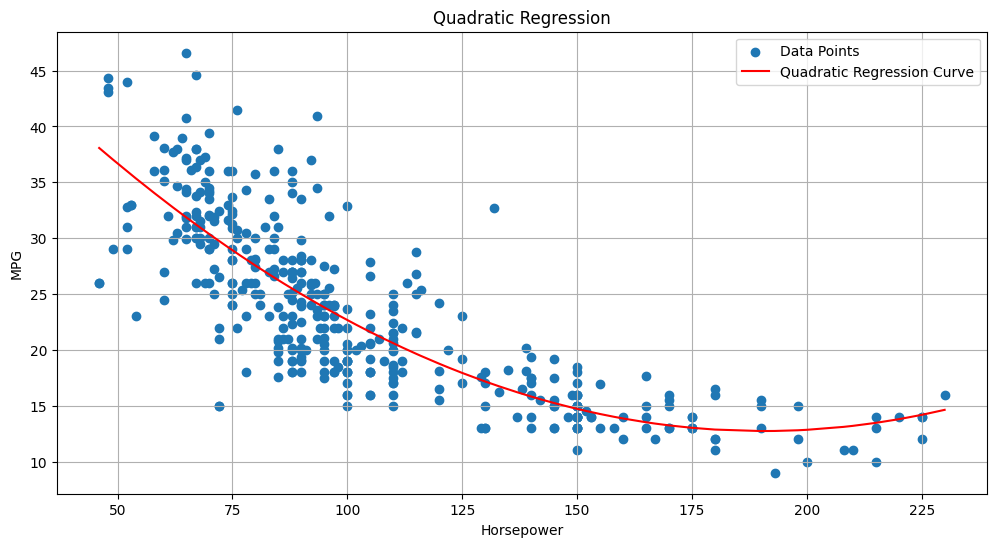

Intercept w0 = 56.78120816038114, Coefficient for w1 = -0.4625633791623604, Coefficient for w2 = 0.0012143177257604948


In [27]:
import numpy as np
import matplotlib.pyplot as plt

X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values

# Add a column for the intercept and a column for x^2
X = np.hstack((np.ones(X.shape), X, X**2))

# Closed form solution for quadratic regression:  (X^T * X)^-1 * X^T * y
X_transpose = X.T
beta_hat = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

# Target Value
y_pred = X.dot(beta_hat)

# Sort X and y_pred based to get smooth curve
sorted_indices = np.argsort(X[:, 1])
X_sorted = X[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.figure(figsize=(12, 6))
plt.scatter(df['horsepower'], df['mpg'], label='Data Points')
plt.plot(X_sorted[:, 1], y_pred_sorted, color='red', label='Quadratic Regression Curve')

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Quadratic Regression')

plt.grid(True)
plt.legend()
plt.show()

intercept, coeff_x, coeff_x_squared = beta_hat[0], beta_hat[1], beta_hat[2]
print(f'Intercept w0 = {intercept}, Coefficient for w1 = {coeff_x}, Coefficient for w2 = {coeff_x_squared}')


The red curve in the plot bends up and down, unlike the straight line used in basic predictions. This is because it uses a special squared number that lets it follow the actual pattern of the data more closely.
At first, the curve goes down, meaning cars with more power usually have lower mpg. But then, because of a special number in the equation that squares the horsepower, the curve can bend, showing that this "more power, less mpg" rule changes as the horsepower gets really high or low. So, for cars with really strong or really weak engines, the mpg might not drop off as quickly.

***10- Repeat part 8 (simple linear regression case) but now by implementing the
gradient descent algorithm instead of the closed form solution.****


Stochastic Gradient Descent (SGD) processes the dataset by taking one example at a time, running a training cycle for that instance, and then updating the model's parameters based on each individual example before moving on to the next.




Epoch 1000, Theta0: 23.83766757316362, Theta1: -0.023147385019496175
Epoch 2000, Theta0: 33.70947146348407, Theta1: -0.08311363787442148
Epoch 3000, Theta0: 37.53612291798507, Theta1: -0.13699876042339607
Epoch 4000, Theta0: 39.03537559063737, Theta1: -0.16145381218001278
Epoch 5000, Theta0: 39.62711647087938, Theta1: -0.15789520249129949
Epoch 6000, Theta0: 39.86409657536496, Theta1: -0.15092056497512493
Epoch 7000, Theta0: 39.9511840310911, Theta1: -0.17230428412880205
Epoch 8000, Theta0: 39.976935196673736, Theta1: -0.14107157515948485
Epoch 9000, Theta0: 39.99709876730635, Theta1: -0.13961886683720356
Epoch 10000, Theta0: 40.00175658829396, Theta1: -0.16079378003551067
Epoch 11000, Theta0: 39.99857146200918, Theta1: -0.1611932373110935


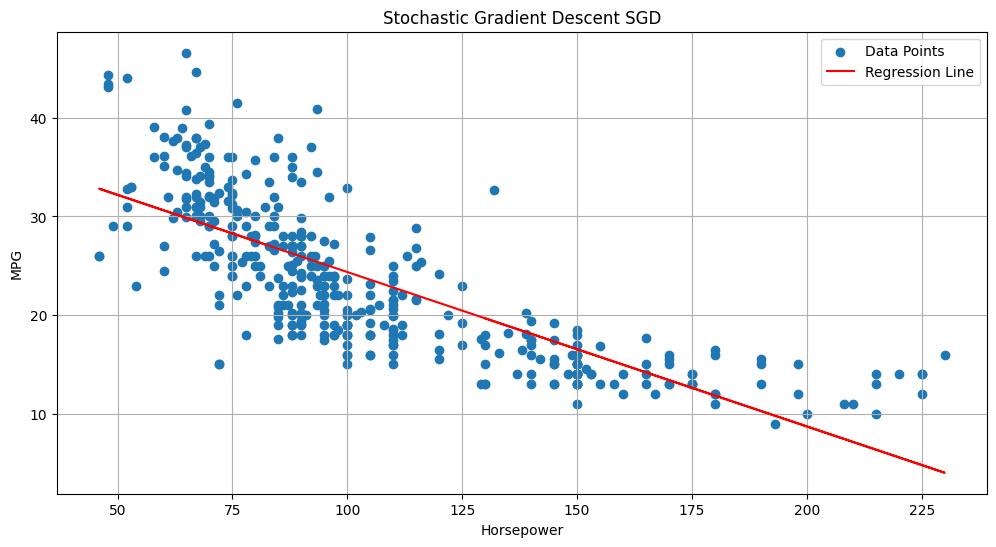

Intercept (theta0) = 40.01720802345201, Slope (theta1) = -0.15650758150898192


In [153]:

import numpy as np

X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values

X = np.hstack((np.ones(X.shape), X))

# Initialize [theta0 and theta1]
theta = np.random.randn(2)

learning_rate = 0.00001
epochs = 11500

# MSE
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    return (1/2*m) * np.sum(np.square(y_pred - y))

# Gradient Descent
for epoch in range(epochs):
    for i in range(len(X)):
        random_index = np.random.randint(len(X))
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_rate * gradients

    # theta values in each 1000 iterations
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch {epoch + 1}, Theta0: {theta[0]}, Theta1: {theta[1]}')

# Theta final values
intercept, slope = theta

# predict
y_pred = X.dot(theta)

plt.figure(figsize=(12, 6))
plt.scatter(df['horsepower'], df['mpg'], label='Data Points')
plt.plot(X[:, 1], y_pred, color='red', label='Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Stochastic Gradient Descent SGD')
plt.legend()
plt.grid(True)
plt.show()

print(f'Intercept (theta0) = {intercept}, Slope (theta1) = {slope}')


Same result in the simple linear regression